<a href="https://colab.research.google.com/github/Darshikartisto/MachineLearningDarshika/blob/main/backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
def f(x):
  return 3+x**2+5

In [50]:
f(3.0)

17.0

In [51]:
xs=np.arange(-5,5,0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [52]:
ys=f(xs)
ys

array([33.    , 30.5625, 28.25  , 26.0625, 24.    , 22.0625, 20.25  ,
       18.5625, 17.    , 15.5625, 14.25  , 13.0625, 12.    , 11.0625,
       10.25  ,  9.5625,  9.    ,  8.5625,  8.25  ,  8.0625,  8.    ,
        8.0625,  8.25  ,  8.5625,  9.    ,  9.5625, 10.25  , 11.0625,
       12.    , 13.0625, 14.25  , 15.5625, 17.    , 18.5625, 20.25  ,
       22.0625, 24.    , 26.0625, 28.25  , 30.5625])

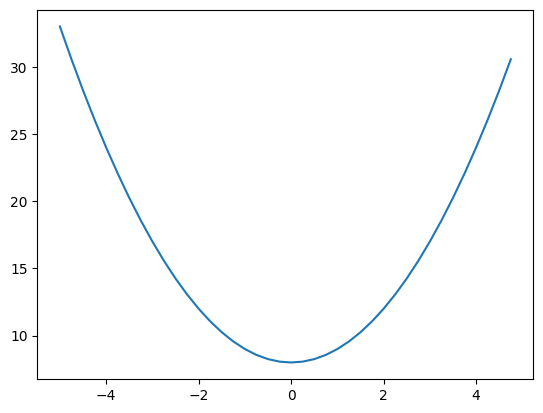

In [53]:
plt.plot(xs,ys)

In [54]:
h=0.000001
x=2/3
(f(x+h)-f(x))/h

1.3333343336086045

In [55]:
a=2.0
b=-3.0
c=10.0
d=a*b+c
print(d)

4.0


In [56]:
h=0.001
a=2.0
b=-3.0
c=10.0
d1=a*b+c
a+=h
d2=a*b+c
print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)
#differentiating the function d1=a*b+c with respect to a gives b that states the fact that the slope is equal to -3
#and the slopes are both sath calculated one and the actual one

d1 4.0
d2 3.997
slope -3.0000000000001137


In [61]:
class value:
  def __init__(self,data,_children=(),_op='',label=''):
    self.data=data
    self._prev=set(_children)
    self._op=_op
    self.label=label
  def __repr__(self):
    return f"value data={self.data}"
  def __add__(self,other):
    out=value(self.data+other.data,(self,other),'+')
    return out
  def __mul__(self,other):
    out=value(self.data*other.data,(self,other),'*')
    return out

a=value(2.0,label='a')
b=value(-3.0,label='b')
c=value(10.0,label='c')
e=a*b; e.label='e'
d=e+c;d.label='d'
d

value data=4.0

In [62]:
d._prev

{value data=-6.0, value data=10.0}

In [63]:
from graphviz import Digraph
def trace(root):
  nodes,edges=set(),set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child,v))
        build(child)
  build(root)
  return nodes,edges

def draw_dot(root):
  dot=Digraph(format='svg',graph_attr={'rankdir':'LR'})
  nodes,edges=trace(root)
  for n in nodes:
    uid=str(id(n))
    dot.node(name=uid, label="{%s|data %.4f}" % (n.label,n.data,), shape='record')
    if n._op:
      dot.node(name=uid+n._op,label=n._op)
      dot.edge(uid+n._op,uid)

  for n1,n2 in edges:
    dot.edge(str(id(n1)),str(id(n2))+n2._op)
  return dot

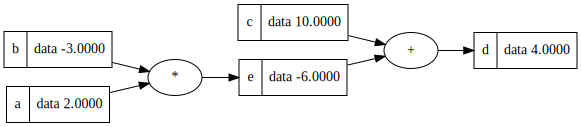

In [64]:
draw_dot(d)